In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Define column names for the dataset
columns = ['user_id', 'movie_id', 'rating', 'timestamp']
# Load the MovieLens 100K dataset containing user-movie interactions
data = pd.read_csv('C:/Users/USER/Downloads/ml-100k/u.data', sep='\t', names= columns)
data

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
# Create a User-Item matrix where rows are users, columns are movies, and values are ratings.
# Fill missing values with 0 to handle unrated movies.
user_item_matrix = data.pivot(index = 'user_id',columns = 'movie_id',values='rating').fillna(0)

In [6]:
user_item_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Import library for sparse matrix representation
from scipy.sparse import csr_matrix
# Convert the dense user-item matrix to a sparse matrix format for memory efficiency
sparse_user_item_matrix = csr_matrix(user_item_matrix.values)


C:\Users\USER\AppData\Local\Temp\ipykernel_3248\3019517253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')


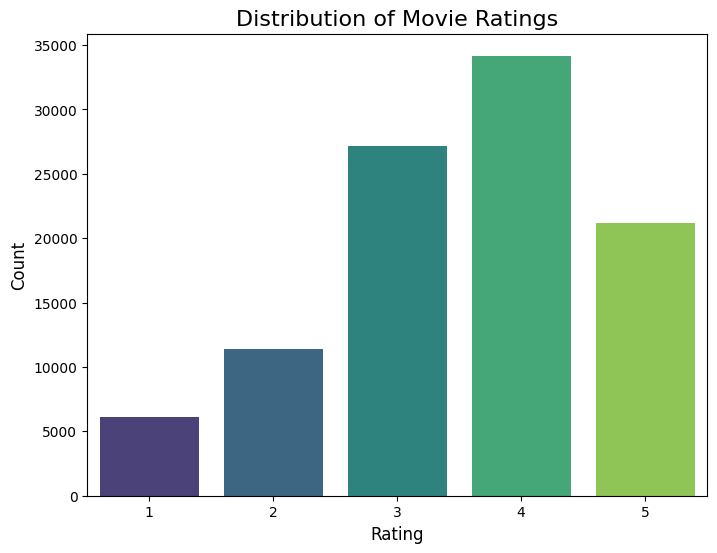

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

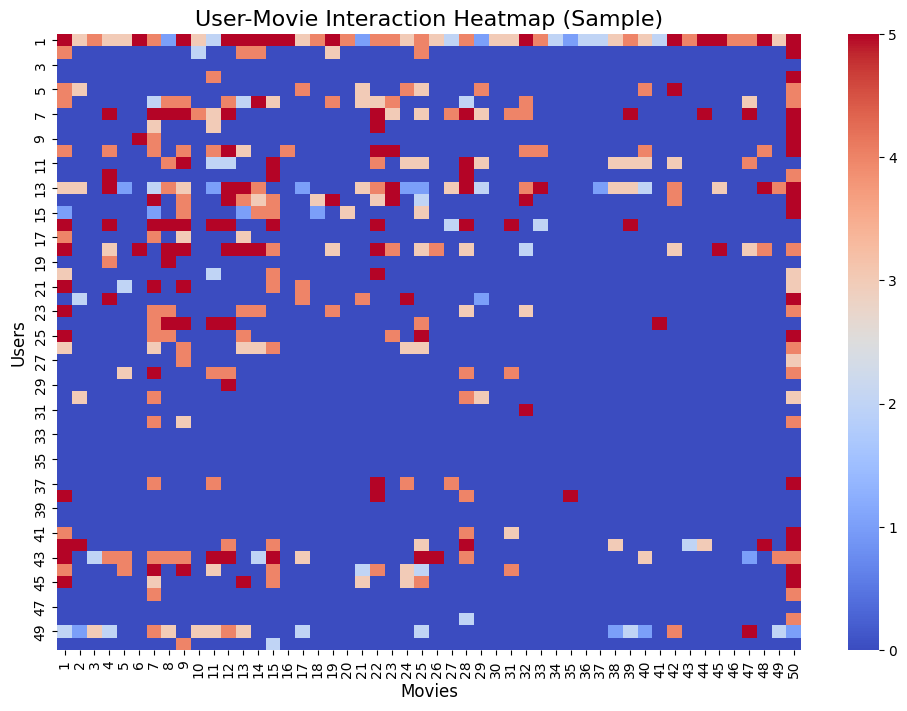

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(user_item_matrix.iloc[:50, :50], cmap='coolwarm', cbar=True)
plt.title('User-Movie Interaction Heatmap (Sample)', fontsize=16)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Train a KNN model using cosine similarity to find similar movies
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(sparse_user_item_matrix.T) 


NearestNeighbors(algorithm='brute', metric='cosine')

In [17]:
def get_movie_recommendations(movie_id, num_recommendations=5):
    """
    Recommends movies similar to a given movie ID.
    
    Parameters:
        movie_id (int): The ID of the movie for which recommendations are required.
        num_recommendations (int): The number of similar movies to recommend.
    
    Returns:
        recommended_movie_ids (list): List of recommended movie IDs.
    """
    # Get the column index of the movie in the user-item matrix
    movie_idx = user_item_matrix.columns.get_loc(movie_id)
    
    # Use KNN to find the nearest neighbors of the given movie
    distances, indices = knn.kneighbors(
        sparse_user_item_matrix.T[movie_idx], 
        n_neighbors=num_recommendations + 1  # Include the movie itself
    )
    
    # Exclude the input movie from recommendations
    movie_indices = indices.flatten()[1:]
    
    # Map indices back to movie IDs
    recommended_movie_ids = user_item_matrix.columns[movie_indices]
    
    return recommended_movie_ids

In [ ]:
# Test the recommendation function for movie ID 1
recommended_movies = get_movie_recommendations(movie_id=1, num_recommendations=5)
print(f"Recommended movies for movie ID 1: {recommended_movies}")


Recommended movies for movie ID 23: Index([50, 181, 121, 117, 405], dtype='int64', name='movie_id')


In [ ]:
# Load movie titles to map movie IDs to their titles
movies = pd.read_csv('C:/Users/USER/Downloads/ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['movie_id', 'title'])
movies


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
# Define a helper function to fetch movie titles based on their IDs
def get_movie_title(movie_id):
    """
    Returns the title of a movie given its ID.
    
    Parameters:
        movie_id (int): The ID of the movie.
    
    Returns:
        str: Title of the movie.
    """
    return movies[movies['movie_id'] == movie_id]['title'].values[0]

# Print the titles of the recommended movies
for movie_id in recommended_movies:
    print(get_movie_title(movie_id))

Star Wars (1977)
Return of the Jedi (1983)
Independence Day (ID4) (1996)
Rock, The (1996)
Mission: Impossible (1996)


C:\Users\USER\AppData\Local\Temp\ipykernel_3248\3870482610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommended_titles, y=[1] * len(recommended_titles), palette='cool')


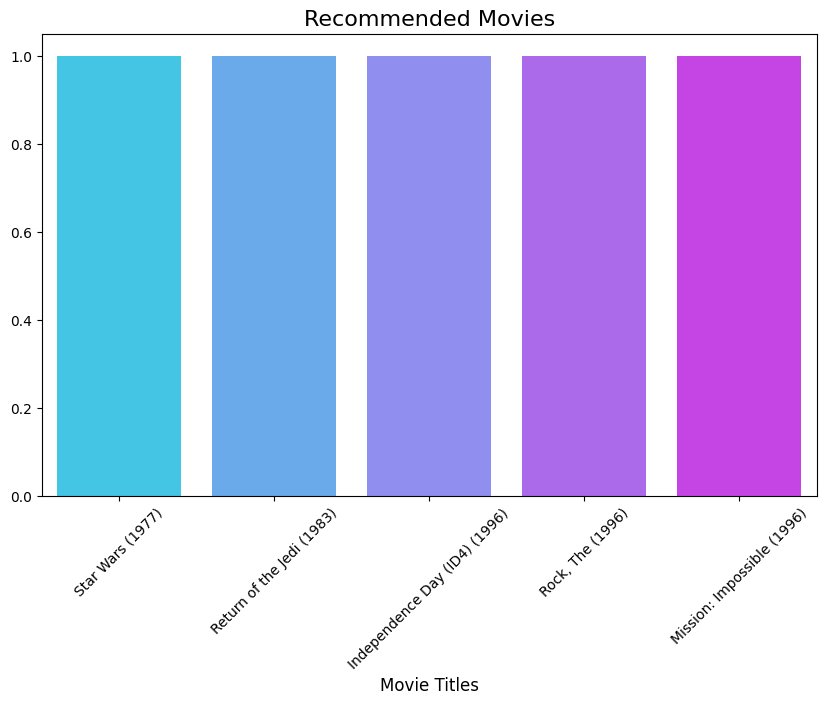

In [21]:
recommended_titles = [get_movie_title(mid) for mid in recommended_movies]
plt.figure(figsize=(10, 6))
sns.barplot(x=recommended_titles, y=[1] * len(recommended_titles), palette='cool')
plt.title('Recommended Movies', fontsize=16)
plt.xlabel('Movie Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()